In [1]:
# %matplotlib widget
# %matplotlib ipympl
# %matplotlib qt

In [2]:
from mpl_toolkits.mplot3d import Axes3D

import h5py
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

# import ipympl

In [3]:
filename = './data/ModelNet40_cloud.h5'

In [4]:
exclude_classes = (0,2) # (6,9) # [x for x in range( 40 )]

filename0 = './data/ModelNet38_cloud.h5'
filename1 = './data/ModelNet02_cloud.h5'

In [5]:
h5py_data = h5py.File( filename, 'r' )

In [6]:
train_data = np.array( h5py_data[ 'tr_cloud' ] )
train_lbls = np.array( h5py_data[ 'tr_labels' ] )

test_data = np.array( h5py_data[ 'test_cloud' ] )
test_lbls = np.array( h5py_data[ 'test_labels' ] )

In [7]:
print( "Train data shape is {}.".format( np.shape( train_data ) ) )
print( "Train labels shape is {}.".format( np.shape( train_lbls ) ) )

print( "Test data shape is {}.".format( np.shape( test_data ) ) )
print( "Test labels shape is {}.".format( np.shape( test_lbls ) ) )

Train data shape is (9842, 10000, 3).
Train labels shape is (9842,).
Test data shape is (2467, 10000, 3).
Test labels shape is (2467,).


In [8]:
test_flag  = False
train_flag = False
for cc in exclude_classes:
    test_flag  = np.logical_or( test_flag, cc==test_lbls )
    train_flag = np.logical_or( train_flag, cc==train_lbls )

In [9]:
flag = np.logical_not( train_flag )
train_data0 = train_data[flag,:,:]
train_lbls0 = train_lbls[flag]

flag = np.logical_not( test_flag )
test_data0 = test_data[flag,:,:]
test_lbls0 = test_lbls[flag]

with h5py.File( filename0, 'w' ) as hf:
    hf.create_dataset( 'tr_cloud',  data=train_data0 )
    hf.create_dataset( 'tr_labels', data=train_lbls0 )
    
    hf.create_dataset( 'test_cloud',  data=test_data0 )
    hf.create_dataset( 'test_labels', data=test_lbls0 )

In [10]:
def update_class( lbls, exclude_classes ):
    for ii, cc in enumerate( exclude_classes ):
        flag = ( lbls == cc )
        lbls[flag] = np.ones( (np.sum( flag ) ) ) * ii
        print( "Replaced {} {}'s with {}.".format( np.sum( flag ), cc, ii ) )

In [11]:
flag = train_flag
train_data1 = train_data[flag,:,:]
train_lbls1 = train_lbls[flag]

update_class( train_lbls1, exclude_classes )

flag = test_flag
test_data1 = test_data[flag,:,:]
test_lbls1 = test_lbls[flag]

update_class( test_lbls1, exclude_classes )

with h5py.File( filename1, 'w' ) as hf:
    hf.create_dataset( 'tr_cloud',  data=train_data1 )
    hf.create_dataset( 'tr_labels', data=train_lbls1 )
    
    hf.create_dataset( 'test_cloud',  data=test_data1 )
    hf.create_dataset( 'test_labels', data=test_lbls1 )

Replaced 626 0's with 0.
Replaced 515 2's with 1.
Replaced 100 0's with 0.
Replaced 100 2's with 1.


Text(0.5,0.92,'Example Model\nBoundary Points (10,000)')

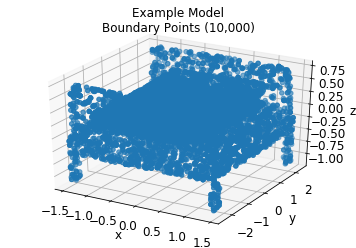

In [12]:
tmp = train_data1[-1]

fig = plt.figure()
ax  = fig.add_subplot( 111, projection='3d' )

ax.scatter( tmp[:,0], tmp[:,1], tmp[:,2] )

ax.tick_params( axis='both', which='major', labelsize=12 )
ax.set_xlabel( 'x', fontsize="large" )
ax.set_ylabel( 'y', fontsize="large" )
ax.set_zlabel( 'z', fontsize="large" )
ax.set_title( "Example Model\nBoundary Points (10,000)", fontsize="large" )

# fig.savefig( '../images/bed_10000.png', format='png', dpi=216 )

Text(0.5,0.92,'Example Model\nBoundary Points (100)')

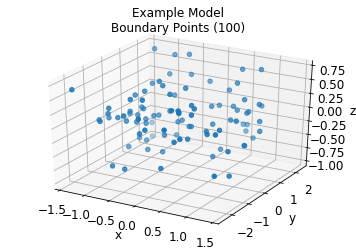

In [13]:
fig = plt.figure()
ax  = fig.add_subplot( 111, projection='3d' )

ax.scatter( tmp[::100,0], tmp[::100,1], tmp[::100,2] )

ax.tick_params( axis='both', which='major', labelsize=12 )
ax.set_xlabel( 'x', fontsize="large" )
ax.set_ylabel( 'y', fontsize="large" )
ax.set_zlabel( 'z', fontsize="large" )
ax.set_title( "Example Model\nBoundary Points (100)", fontsize="large" )

# fig.savefig( '../images/bed_100.png', format='png', dpi=216 )

In [14]:
class_names = [ 
    "airplane", "bathtub", "bed", "bench", "bookshelf", "bottle", "bowl", "car", "chair", "cone", 
    "cup", "curtain", "desk", "door", "dresser", "flower_pot", "glass_box", "guitar", "keyboard", "lamp", 
    "laptop", "mantel", "monitor", "night_stand", "person", "piano", "plant", "radio", "range_hood", "sink", 
    "sofa", "stairs", "stool", "table", "tent", "toilet", "tv_stand", "vase", "wardrobe", "xbox"
]

In [15]:
def hide_axes( ax ):
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.zaxis.set_ticks([])

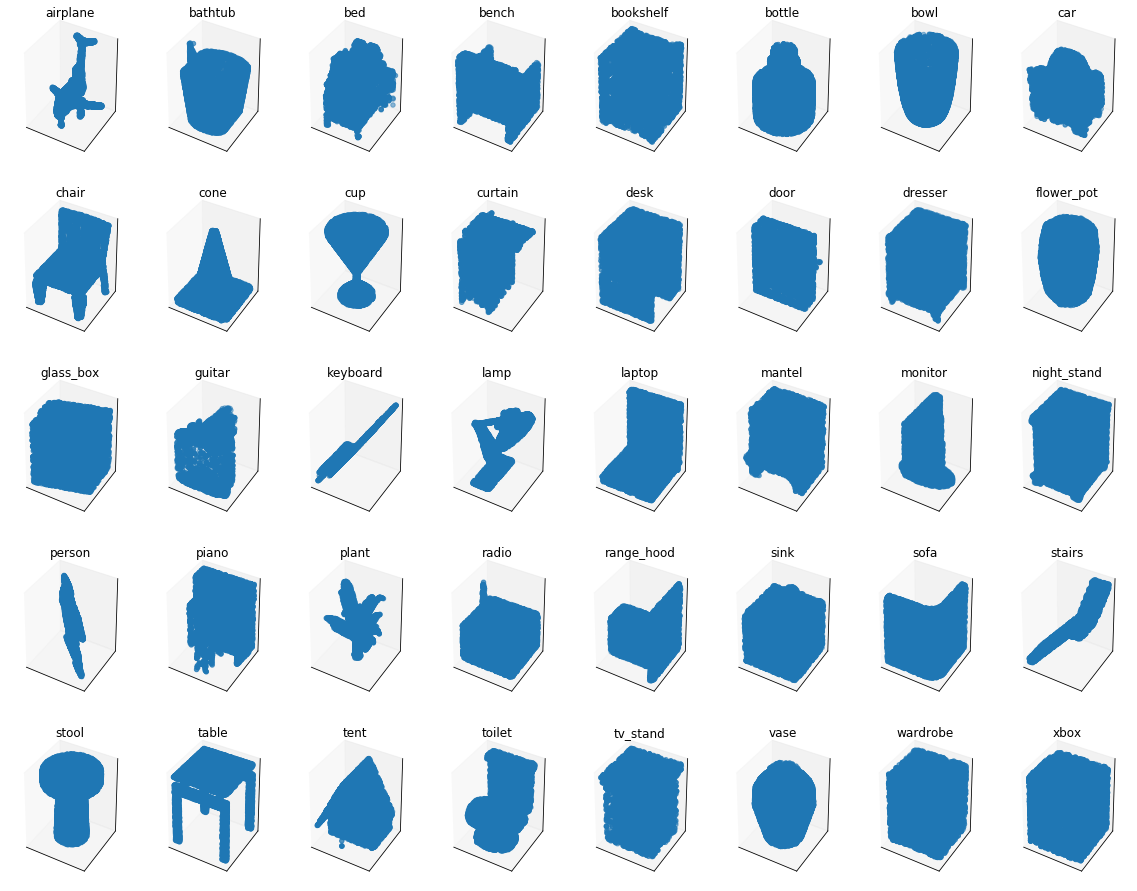

In [16]:
_, ind = np.unique( train_lbls, return_index=True )

fig = plt.figure( figsize=(20,16) )

C = 8
R = 5
for aa in range( R * C ):
    ax = fig.add_subplot( R, C, aa+1, projection='3d' )
    data = train_data[ind[aa]]
    ax.scatter( data[:,0], data[:,1], data[:,2] )
    
    hide_axes( ax )
    
    ax.set_title( class_names[aa], fontsize='large' )
    
fig.savefig( '../images/modelnet40.png', format='png', dpi=216 )